## Balanced Data Generation

In ordrer to train the network correctly the training data must be balance. Balance data will provide enough instances for training each category. 

1. Generate 1 million instances 
2. Save it as a unbalanced data set
3. Dublicate low probability cards
4. Decrease the high occurung hands
5. Save balanced data set

Save the training and test sets in order to fairly test all models.

### Raw Data

In [2]:
import utils
import tensorflow as tf
from tensorflow.keras import preprocessing
import numpy as np

### Save raw hands

In [104]:
raw_hands = []
raw_hands_label = []
for h in range(1000000):
    raw_hands.append(training_set[h][4])
    raw_hands_label.append(training_set[h][0])

In [109]:
np.savetxt('raw_training_set_1mil.dat', raw_hands, fmt='%s', delimiter=',')
np.savetxt('raw_label_set_1mil.dat', raw_hands_label, fmt='%i')

### Hand distribution in a raw training set

```
Hand probabilities of the raw training data:
High card probability: 		 17.4424 %
Pair probability: 		     43.8591 %
Two paris probability: 		 23.4389 %
Three cards probability: 	 4.8403 %
Straight probability: 		 4.5965 %
Flush probability: 		     3.0368 %
Full house probability: 	 2.5804 %
Four cards probability: 	 0.1787 %
Straight flush probability:  0.026899999999999997 %
```

In [44]:
#The goal is to calculate the precentage of each hand

count_straight_flush = 0
count_four = 0
count_full_house = 0
count_flush = 0
count_straight = 0
count_three = 0
count_two_pairs = 0
count_pair = 0
count_high_card = 0

for cr in training_set:
    if cr[0] == 8:
        count_straight_flush += 1
    elif cr[0] == 7:
        count_four += 1
    elif cr[0] == 6:
        count_full_house += 1
    elif cr[0] == 5:
        count_flush += 1
    elif cr[0] == 4:
        count_straight += 1
    elif cr[0] == 3:
        count_three += 1
    elif cr[0] == 2:
        count_two_pairs += 1
    elif cr[0] == 1:
        count_pair += 1
    elif cr[0] == 0:
        count_high_card += 1

print('Hand probabilities of the raw training data:')
print('High card probability: \t\t', count_high_card/1000000*100, '%')
print('Pair probability: \t\t', count_pair/1000000*100, '%') 
print('Two paris probability: \t\t', count_two_pairs/1000000*100, '%')
print('Three cards probability: \t', count_three/1000000*100, '%')
print('Straight probability: \t\t', count_straight/1000000*100, '%')
print('Flush probability: \t\t', count_flush/1000000*100, '%') 
print('Full house probability: \t', count_full_house/1000000*100, '%')
print('Four cards probability: \t', count_four/1000000*100, '%')
print('Straight flush probability: \t', count_straight_flush/1000000*100, '%')

Hand probabilities of the raw training data:
High card probability: 		 17.4424 %
Pair probability: 		 43.8591 %
Two paris probability: 		 23.4389 %
Three cards probability: 	 4.8403 %
Straight probability: 		 4.5965 %
Flush probability: 		 3.0368 %
Full house probability: 	 2.5804 %
Four cards probability: 	 0.1787 %
Straight flush probability: 	 0.026899999999999997 %


In [46]:
print('Hand count of the raw training data:')
print('High card count: \t', count_high_card)
print('Pair count: \t\t', count_pair) 
print('Two paris count: \t', count_two_pairs)
print('Three cards count: \t', count_three)
print('Straight count: \t', count_straight)
print('Flush count: \t\t', count_flush) 
print('Full house count: \t', count_full_house)
print('Four cards count: \t', count_four)
print('Straight flush count: \t', count_straight_flush)

Hand count of the raw training data:
High card count: 	 174424
Pair count: 		 438591
Two paris count: 	 234389
Three cards count: 	 48403
Straight count: 	 45965
Flush count: 		 30368
Full house count: 	 25804
Four cards count: 	 1787
Straight flush count: 	 269


### Balanced Training Set

```
Hand probabilities of the raw training data:
High card probability: 		 11.276955883862048 %
Pair probability: 		 11.276955883862048 %
Two paris probability: 		 11.276955883862048 %
Three cards probability: 	 10.91666074632403 %
Straight probability: 		 10.36680187601562 %
Flush probability: 		 10.273655151882162 %
Full house probability: 	 11.63950639002315 %
Four cards probability: 	 11.687996815419504 %
Straight flush probability: 	 11.284511368749387 %

```

In [80]:
balanced_training_set = []

for cr in training_set:
    if cr[0] == 3 or cr[0] == 4:
        for i in range(2):
            balanced_training_set.append(cr)
    elif cr[0] == 5:
        for i in range(3):
            balanced_training_set.append(cr)
    elif cr[0] == 6:
        for i in range(4):
            balanced_training_set.append(cr)
    elif cr[0] == 7:
        for i in range(58):
            balanced_training_set.append(cr)
    elif cr[0] == 8:
        for i in range(372):
            balanced_training_set.append(cr)

In [81]:
limit0 = 0
limit1 = 0
limit2 = 0

for c in training_set:
    if c[0] == 0 and 100000 >= limit0:
        limit0 += 1
        balanced_training_set.append(c)
    elif c[0] == 1 and 100000 >= limit1:
        limit1 += 1
        balanced_training_set.append(c)
    elif c[0] == 2 and 100000 >= limit2:
        limit2 += 1
        balanced_training_set.append(c)

In [83]:
count_straight_flush = 0
count_four = 0
count_full_house = 0
count_flush = 0
count_straight = 0
count_three = 0
count_two_pairs = 0
count_pair = 0
count_high_card = 0

for cr in balanced_training_set:
    if cr[0] == 8:
        count_straight_flush += 1
    elif cr[0] == 7:
        count_four += 1
    elif cr[0] == 6:
        count_full_house += 1
    elif cr[0] == 5:
        count_flush += 1
    elif cr[0] == 4:
        count_straight += 1
    elif cr[0] == 3:
        count_three += 1
    elif cr[0] == 2:
        count_two_pairs += 1
    elif cr[0] == 1:
        count_pair += 1
    elif cr[0] == 0:
        count_high_card += 1

print('Hand probabilities of the balanced training data:')
print('High card probability: \t\t', count_high_card/len(balanced_training_set)*100, '%')
print('Pair probability: \t\t', count_pair/len(balanced_training_set)*100, '%') 
print('Two paris probability: \t\t', count_two_pairs/len(balanced_training_set)*100, '%')
print('Three cards probability: \t', count_three/len(balanced_training_set)*100, '%')
print('Straight probability: \t\t', count_straight/len(balanced_training_set)*100, '%')
print('Flush probability: \t\t', count_flush/len(balanced_training_set)*100, '%') 
print('Full house probability: \t', count_full_house/len(balanced_training_set)*100, '%')
print('Four cards probability: \t', count_four/len(balanced_training_set)*100, '%')
print('Straight flush probability: \t', count_straight_flush/len(balanced_training_set)*100, '%')

Hand probabilities of the raw training data:
High card probability: 		 11.276955883862048 %
Pair probability: 		 11.276955883862048 %
Two paris probability: 		 11.276955883862048 %
Three cards probability: 	 10.91666074632403 %
Straight probability: 		 10.36680187601562 %
Flush probability: 		 10.273655151882162 %
Full house probability: 	 11.63950639002315 %
Four cards probability: 	 11.687996815419504 %
Straight flush probability: 	 11.284511368749387 %


In [112]:
balanced_hands = []
balanced_hands_label = []
for b in range(len(balanced_training_set)):
    balanced_hands.append(balanced_training_set[b][4])
    balanced_hands_label.append(balanced_training_set[b][0])

In [114]:
np.savetxt('balanced_training_set_1mil.dat', balanced_hands, fmt='%s', delimiter=',')
np.savetxt('balanced_label_set_1mil.dat', balanced_hands_label, fmt='%i')

### Loading data

In [2]:
training_set = np.loadtxt("balanced_training_set_1mil.dat", dtype=str, delimiter=',')
labels = np.loadtxt("balanced_label_set_1mil.dat", dtype=int, delimiter=',')

### Prep balanced data for training a RNN

In [3]:
card_str_list = []
catgory_list = []
for l in range(len(training_set)):
    card_str_list.append(list(training_set[l]))
    catgory_list.append(labels[l])
    
depth = 9
catgory_list = tf.one_hot(catgory_list, depth)

In [4]:
string_of_cards = []

for row in card_str_list:
    string_of_cards.append(row[0] + ' ' + row[1] + ' ' +row[2] + ' ' +row[3] + ' ' +row[4] + ' ' +row[5] + ' ' +row[6])

In [5]:
train_dataset = tf.data.Dataset.from_tensor_slices((string_of_cards, catgory_list))

In [6]:
train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(9,), dtype=tf.float32, name=None))

### Test Set Preparation

In [7]:
test_set = []
for i in range(10000):
    New_deck = utils.init_standard_deck()
    chosen_cards, remained_cards = utils.get_random_cards(New_deck, 7)
    test_set.append(utils.Card_Rank(chosen_cards))

In [8]:
card_str_list = []
catgory_list = []

for row in test_set:
    card_str_list.append(row[4])
    catgory_list.append(row[0])

depth = 9
catgory_list = tf.one_hot(catgory_list, depth)

string_of_cards = []
for row in card_str_list:
    string_of_cards.append(row[0] + ' ' + row[1] + ' ' +row[2] + ' ' +row[3] + ' ' +row[4] + ' ' +row[5] + ' ' +row[6])

In [9]:
test_dataset = tf.data.Dataset.from_tensor_slices((string_of_cards, catgory_list))

In [10]:
test_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(9,), dtype=tf.float32, name=None))

### Bath size and shuffel the data

In [11]:
BUFFER_SIZE = 10
BATCH_SIZE = 100
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)


In [12]:
for example, label in train_dataset.take(1):
    print('text: ', example.numpy())
    print('type: ', type(example.numpy()))
    print('label: ', label.numpy())
    print('type: ', type(label.numpy()))

text:  [b'SA H2 CK C2 S2 H6 C5' b'C5 SQ C8 H2 S8 S9 H8' b'H5 C7 S4 D5 C4 C3 C5'
 b'C5 SQ C8 H2 S8 S9 H8' b'SA C7 D5 H9 CA CK DA' b'SA C7 D5 H9 CA CK DA'
 b'C6 D6 D4 HA H6 DT S5' b'S5 C4 C6 C5 C7 H6 H3' b'H5 C7 S4 D5 C4 C3 C5'
 b'H5 C7 S4 D5 C4 C3 C5' b'S3 C6 D5 C3 H5 C5 CQ' b'C4 C3 C2 SQ CQ H2 C9'
 b'H5 C7 S4 D5 C4 C3 C5' b'S3 C6 D5 C3 H5 C5 CQ' b'C6 D6 D4 HA H6 DT S5'
 b'H8 H5 SJ CA SA DA DJ' b'CT D6 D9 C9 S3 H9 HJ' b'SA H2 CK C2 S2 H6 C5'
 b'H8 H5 SJ CA SA DA DJ' b'CT D6 D9 C9 S3 H9 HJ' b'S5 C4 C6 C5 C7 H6 H3'
 b'H8 H5 SJ CA SA DA DJ' b'S6 S2 DT SQ H6 C6 CQ' b'S3 C6 D5 C3 H5 C5 CQ'
 b'S3 C8 S6 SK D8 S8 SJ' b'S6 S2 DT SQ H6 C6 CQ' b'C4 C3 C2 SQ CQ H2 C9'
 b'H8 H5 SJ CA SA DA DJ' b'S6 S2 DT SQ H6 C6 CQ' b'S6 CQ DQ SK SQ HQ DA'
 b'S6 CQ DQ SK SQ HQ DA' b'S6 S2 DT SQ H6 C6 CQ' b'S6 CQ DQ SK SQ HQ DA'
 b'S6 CQ DQ SK SQ HQ DA' b'C4 C3 C2 SQ CQ H2 C9' b'S6 CQ DQ SK SQ HQ DA'
 b'S6 CQ DQ SK SQ HQ DA' b'H4 D2 C7 H5 SA S4 C4' b'S6 CQ DQ SK SQ HQ DA'
 b'S6 CQ DQ SK SQ HQ DA' b'S3 C8 S6 SK D8 S8

In [13]:
BUFFER_SIZE = 10
BATCH_SIZE = 100
test_dataset = test_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)


In [14]:
for example, label in test_dataset.take(1):
    print('text: ', example.numpy())
    print('type: ', type(example.numpy()))
    print('label: ', label.numpy())
    print('type: ', type(label.numpy()))

text:  [b'D8 C3 S8 S3 H2 D7 CT' b'C8 H7 S2 S8 CJ HA S9' b'CQ DK SQ HT D8 D6 C9'
 b'C3 CJ DQ SQ C9 CA D7' b'C9 DQ S5 DK D8 CT H5' b'C3 S3 H5 DA C6 C9 ST'
 b'D9 H9 C4 DK D8 C5 H4' b'DA C4 C7 C5 H9 C6 SA' b'S4 H4 H5 S5 CT HT H2'
 b'D2 HK H2 C9 D8 HT CK' b'C6 SQ CA HT S2 SJ C3' b'DK C5 H3 S6 DT CQ CK'
 b'HJ C7 H4 S2 D4 S3 H6' b'SK CK D9 C4 H4 SQ S5' b'HT HA H9 S9 S6 S8 C8'
 b'H3 D9 S9 C2 S7 C8 HQ' b'S3 HJ H2 SA C7 DA H5' b'DK HT H3 CT C4 H8 HJ'
 b'SJ HT H7 DK S7 H5 D8' b'D3 H6 H7 D4 SJ DQ DK' b'D9 S9 SQ H8 C6 H7 HK'
 b'CJ C3 C6 D3 H9 D2 H6' b'H7 C7 CA HJ H2 HT S6' b'D4 D6 HT C4 HJ HA H7'
 b'D5 C5 CA HK C3 D3 C9' b'H2 HQ HK D6 D9 H3 H8' b'S4 SQ C6 DK HT C7 S6'
 b'CQ HA S3 D5 HJ D3 C6' b'D6 H9 ST H3 HQ C6 C8' b'H4 D8 DT S6 S7 C6 C8'
 b'CT D2 C3 SQ H3 CK C4' b'SK D5 S8 DA D4 SA H2' b'DK H9 CA ST H4 D5 DA'
 b'S8 H5 D6 CQ S3 C9 C7' b'HT C5 CJ D7 C6 C4 SJ' b'H8 S5 H6 C4 H7 ST DQ'
 b'CQ D6 C4 D5 CK D9 D4' b'D8 C7 H3 D4 H4 CT S9' b'D6 SQ S4 C8 ST C4 D3'
 b'DT CQ DJ S2 C6 C9 H2' b'CK H7 C6 SQ D5 H4

### Vectorization of the data

In [15]:
VOCAB_SIZE = 54
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [16]:
import numpy as np
vocab = np.array(encoder.get_vocabulary())
vocab

array(['', '[UNK]', 'd7', 'ht', 'h7', 'h6', 'h5', 'c8', 'c5', 'c7', 'h8',
       'd9', 'd8', 'c6', 'h9', 'ct', 'd6', 'cj', 's6', 'd5', 'c9', 'hj',
       'st', 'dt', 'h4', 'c4', 's7', 's5', 's8', 'dj', 's9', 'd4', 'cq',
       's4', 'h3', 'sj', 'd3', 'hq', 'hk', 'c3', 'sq', 'da', 'dq', 'c2',
       'dk', 'sk', 's3', 'h2', 'ha', 'ca', 'ck', 'sa', 's2', 'd2'],
      dtype='<U5')

In [17]:
encoded_example = encoder(example).numpy()
encoded_example

array([[12, 39, 28, 46, 47,  2, 15],
       [ 7,  4, 52, 28, 17, 48, 30],
       [32, 44, 40,  3, 12, 16, 20],
       [39, 17, 42, 40, 20, 49,  2],
       [20, 42, 27, 44, 12, 15,  6],
       [39, 46,  6, 41, 13, 20, 22],
       [11, 14, 25, 44, 12,  8, 24],
       [41, 25,  9,  8, 14, 13, 51],
       [33, 24,  6, 27, 15,  3, 47],
       [53, 38, 47, 20, 12,  3, 50],
       [13, 40, 49,  3, 52, 35, 39],
       [44,  8, 34, 18, 23, 32, 50],
       [21,  9, 24, 52, 31, 46,  5],
       [45, 50, 11, 25, 24, 40, 27],
       [ 3, 48, 14, 30, 18, 28,  7],
       [34, 11, 30, 43, 26,  7, 37],
       [46, 21, 47, 51,  9, 41,  6],
       [44,  3, 34, 15, 25, 10, 21],
       [35,  3,  4, 44, 26,  6, 12],
       [36,  5,  4, 31, 35, 42, 44],
       [11, 30, 40, 10, 13,  4, 38],
       [17, 39, 13, 36, 14, 53,  5],
       [ 4,  9, 49, 21, 47,  3, 18],
       [31, 16,  3, 25, 21, 48,  4],
       [19,  8, 49, 38, 39, 36, 20],
       [47, 37, 38, 16, 11, 34, 10],
       [33, 40, 13, 44,  3,  9, 18],
 

In [18]:
for n in range(2):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'D8 C3 S8 S3 H2 D7 CT'
Round-trip:  d8 c3 s8 s3 h2 d7 ct

Original:  b'C8 H7 S2 S8 CJ HA S9'
Round-trip:  c8 h7 s2 s8 cj ha s9



### Model 

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=54,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(54)),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(9)
])

In [32]:
print([layer.supports_masking for layer in model.layers])


[False, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [33]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [34]:
history = model.fit(train_dataset, epochs=120,
                    validation_data=test_dataset, 
                    validation_steps=1)

Epoch 1/120
8868/8868 [==============================] - 78s 9ms/step - loss: 0.2625 - accuracy: 0.3067 - val_loss: 1.9380 - val_accuracy: 0.1400
Epoch 2/120
8868/8868 [==============================] - 75s 8ms/step - loss: 0.2542 - accuracy: 0.3480 - val_loss: 1.7883 - val_accuracy: 0.1100
Epoch 3/120
8868/8868 [==============================] - 75s 8ms/step - loss: 0.2517 - accuracy: 0.3568 - val_loss: 1.7759 - val_accuracy: 0.1400
Epoch 4/120
8868/8868 [==============================] - 73s 8ms/step - loss: 0.2485 - accuracy: 0.3693 - val_loss: 1.7068 - val_accuracy: 0.1400
Epoch 5/120
8868/8868 [==============================] - 74s 8ms/step - loss: 0.2396 - accuracy: 0.4071 - val_loss: 1.7328 - val_accuracy: 0.1200
Epoch 6/120
8868/8868 [==============================] - 64s 7ms/step - loss: 0.2298 - accuracy: 0.4365 - val_loss: 1.7309 - val_accuracy: 0.1500
Epoch 7/120
8868/8868 [==============================] - 51s 6ms/step - loss: 0.2165 - accuracy: 0.4760 - val_loss: 1.8934 -

Epoch 57/120
8868/8868 [==============================] - 63s 7ms/step - loss: 0.0109 - accuracy: 0.9883 - val_loss: 0.3090 - val_accuracy: 0.8600
Epoch 58/120
8868/8868 [==============================] - 64s 7ms/step - loss: 0.0096 - accuracy: 0.9898 - val_loss: 0.2991 - val_accuracy: 0.8700
Epoch 59/120
8868/8868 [==============================] - 63s 7ms/step - loss: 0.0104 - accuracy: 0.9890 - val_loss: 0.1955 - val_accuracy: 0.8900
Epoch 60/120
8868/8868 [==============================] - 70s 8ms/step - loss: 0.0083 - accuracy: 0.9910 - val_loss: 0.2191 - val_accuracy: 0.8900
Epoch 61/120
8868/8868 [==============================] - 71s 8ms/step - loss: 0.0085 - accuracy: 0.9911 - val_loss: 0.2367 - val_accuracy: 0.9000
Epoch 62/120
8868/8868 [==============================] - 64s 7ms/step - loss: 0.0079 - accuracy: 0.9920 - val_loss: 0.2287 - val_accuracy: 0.8900
Epoch 63/120
8868/8868 [==============================] - 53s 6ms/step - loss: 0.0074 - accuracy: 0.9924 - val_loss: 0

In [35]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

100/100 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.8794
Test Loss: 0.26138415932655334
Test Accuracy: 0.8794000148773193


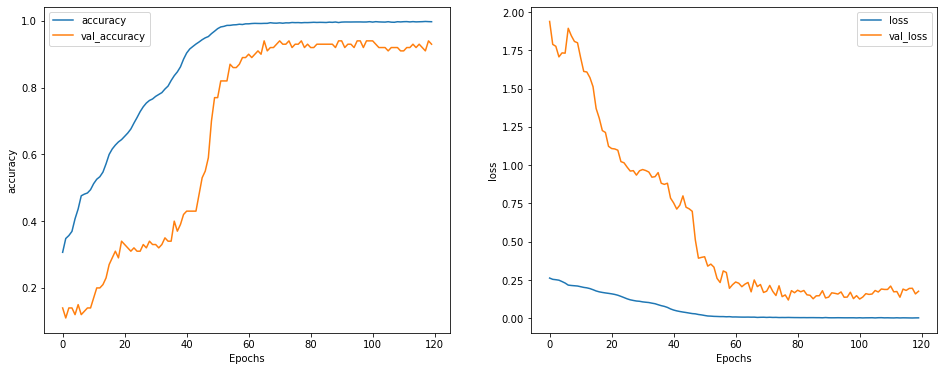

In [36]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(history, 'loss')